In [1]:
import os
import argparse
import numpy as np
import random
from collections import Counter
from sklearn.model_selection import train_test_split

In [2]:
from sklearn import datasets
datasets.

In [2]:
%config InlineBackend.figure_format = "svg"

In [3]:
def load_data_and_split(data_path:str, val_rate:float):
    """
    加载数据集并划分训练集和验证集
    :param data_path: 数据集路径
    :param val_rate: 验证集比例
    :return: 训练集列表，验证集列表，训练集标签列表，验证集标签列表
    """
    with open(data_path,'r') as openfile:
        data_lines = openfile.read().splitlines()  # 读取文件的所有行，忽略换行符
    data_lines = list(set(data_lines))
    data_list,label_list = [],[]
    for data_line in data_lines:
        data_line = data_line.split(",")
        data_list.append(list(map(float,data_line[0:-1])))
        label_list.append(data_line[-1])
    train_data, val_data, train_label, val_label = train_test_split(data_list,\
                                                                    label_list,\
                                                                    test_size=val_rate,\
                                                                    random_state=random.randint(2,1000),\
                                                                    shuffle=True)
    return np.array(train_data),np.array(val_data), np.array(train_label),np.array(val_label)

In [4]:
def get_distance(x,y):
    """
    :return: 返回两个向量欧式距离的平方
    """
    return np.sum((np.array(x)-np.array(y))**2,axis=1)

In [5]:
def val_one_time(k):
    """
    进行一次验证，并返回准确率
    :param k: KNN中的K
    :return: 返回两个向量欧式距离的平方
    """
    train_data, val_data, train_label, val_label = load_data_and_split(data_path="./Iris.txt", val_rate=0.2)
    acc = 0  # 预测正确个数
    for index, val_one_data in enumerate(val_data):
        all_distance = get_distance(val_one_data, train_data)  # 计算当前向量与所有向量的距离
        min_k_distance_label = train_label[all_distance.argsort()[0:k]]  # 当前向量距离最近的k个向量的标签
        count_all_label = Counter(min_k_distance_label)  # 用Counter类统计k个向量中各个标签的数量
        predict_label = count_all_label.most_common(1)[0][0]  # 预测标签
        if predict_label == val_label[index]:
            acc = acc + 1  # 预测正确
    return round(acc / len(val_label) * 100,3) # 计算正确率并保留3位小数

In [6]:
k = 3
# 进行10次验证
times = 10
acc_list, time_list = [],[i+1 for i in range(times)]
for i in time_list:
    acc = val_one_time(k)
    acc_list.append(acc)
    print('The {} time\'s accurcy is {}%'.format(i-1,acc))

The 0 time's accurcy is 100.0%
The 1 time's accurcy is 83.333%
The 2 time's accurcy is 96.667%
The 3 time's accurcy is 96.667%
The 4 time's accurcy is 96.667%
The 5 time's accurcy is 93.333%
The 6 time's accurcy is 90.0%
The 7 time's accurcy is 100.0%
The 8 time's accurcy is 96.667%
The 9 time's accurcy is 96.667%


In [45]:
# 每个k进行50次验证，取准确率的平均值作为最终的准确率
times = 50
k_list = [k for k in range(2,11)] # k的值从2到10
acc_list = []
for k in k_list:
    acc = 0
    for time in range(times):
        acc += val_one_time(k)
    acc_list.append(round(acc/times,3)) # 50次运行结果取平均值，并保留3位小数


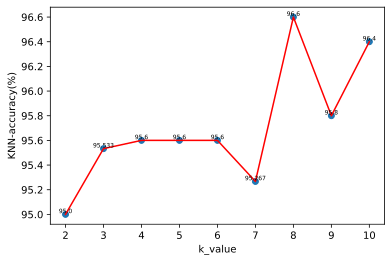

In [46]:
## 对结果进行可视化
import matplotlib.pyplot as plt

fig, aix = plt.subplots()
aix.scatter(k_list,acc_list) # 散点图
aix.plot(k_list,acc_list,c='r') # 折线图
plt.xticks(k_list) # 设置x轴刻度
plt.xlabel("k_value") # 设置x轴标签
plt.ylabel("KNN-accuracy(%)") # 设置y轴标签 
# 将数字标记在折线上方
for a, b in zip(k_list, acc_list):
    plt.text(a, b, b, ha='center', va='bottom', fontsize=6)
plt.savefig("knn_with_diff_k.svg", dpi=300,format="svg") # 保留图片

In [8]:
import matplotlib.pyplot as plt

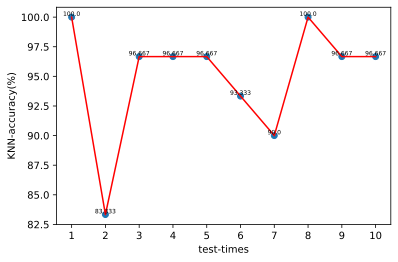

In [25]:
fig, aix = plt.subplots()
aix.scatter(time_list,acc_list)
aix.plot(time_list,acc_list,c='r')
plt.xticks(time_list)
plt.xlabel("test-times")
plt.ylabel("KNN-accuracy(%)")
for a, b in zip(time_list, acc_list):
    plt.text(a, b, b, ha='center', va='bottom', fontsize=6)
plt.savefig("self_knn.svg", dpi=300,format="svg")

In [49]:
def val_one_time_for_self_knn(k, train_data, val_data, train_label, val_label):
    acc = 0  # 预测正确个数
    for index, val_one_data in enumerate(val_data):
        all_distance = get_distance(val_one_data, train_data)  # 计算当前向量与所有向量的距离
        min_k_distance_label = train_label[all_distance.argsort()[0:k]]  # 当前向量距离最近的k个向量的标签
        count_all_label = Counter(min_k_distance_label)  # 用Counter类统计k个向量中各个标签的数量
        predict_label = count_all_label.most_common(1)[0][0]  # 预测标签
        if predict_label == val_label[index]:
            acc = acc + 1  # 预测正确
    return acc / len(val_label) # 计算正确率并保留3位小数

In [50]:
from sklearn.neighbors import KNeighborsClassifier # k近邻算法
from sklearn.naive_bayes import MultinomialNB,CategoricalNB # 朴素贝叶斯算法
from sklearn.tree import DecisionTreeClassifier # 决策树算法

In [111]:
# 每个算法进行50次验证，取准确率的平均值作为最终的准确率
times = 50
k = 3
knc = KNeighborsClassifier(n_neighbors=k) # k近邻算法,设置k取值3
cnb = CategoricalNB() # 朴素贝叶斯算法
dtc = DecisionTreeClassifier() # 决策树算法
acc_self_knn_list = [] # 存储本次实验knn算法准确率
acc_std_knn_list  = [] # 存储sklearn库中knn算法的准确率
acc_std_cnb_list  = [] # 存储sklearn库中朴素贝叶斯算法的准确率
acc_std_dtc_list  = [] # 存储sklearn库中决策树算法准确率
for i in range(times):
    # 划分数据集
    train_data, val_data, train_label, val_label = load_data_and_split(data_path="./Iris.txt", val_rate=0.2)
    acc_self_knn_list.append(val_one_time_for_self_knn(k,train_data, val_data, train_label, val_label))
    knc.fit(train_data, train_label) # sklearn库中knn算法进行训练
    acc_std_knn_list.append(knc.score(val_data, val_label)) # 计算sklearn库中knn算法的准确率
    cnb.fit(train_data, train_label) # sklearn库中朴素贝叶斯算法进行训练
    acc_std_cnb_list.append(cnb.score(val_data, val_label)) # 计算sklearn库中朴素贝叶斯算法的准确率
    dtc.fit(train_data, train_label) # sklearn库中决策树算法进行训练
    acc_std_dtc_list.append(dtc.score(val_data, val_label)) # 计算sklearn库中决策树算法的准确率

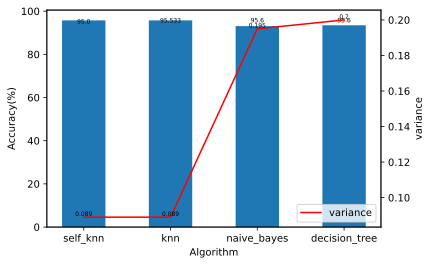

In [119]:
# 结果可视化
acc_lsit = [round(np.mean(acc_self_knn_list)*100,3),\
            round(np.mean(acc_std_knn_list)*100,3),\
            round(np.mean(acc_std_cnb_list)*100,3),\
            round(np.mean(acc_std_dtc_list)*100,3)] # 计算各个算法的平均准确率并保留3位小数
var_list = [round(np.var(acc_self_knn_list)*100,3),\
            round(np.var(acc_std_knn_list)*100,3),\
            round(np.var(acc_std_cnb_list)*100,3),\
            round(np.var(acc_std_dtc_list)*100,3)] # 计算各个算法50次运行的方差，并保留3位小数
labels = ['self_knn', 'knn', 'naive_bayes', 'decision_tree']
fig, ax1 = plt.subplots()
ax1.bar(range(len(acc_lsit)), acc_lsit, tick_label=labels,width=0.5) # 柱状图
ax1.set_xlabel('Algorithm') # x轴标签
ax1.set_ylabel('Accuracy(%)') # y轴标签
for a, b in zip(range(len(acc_lsit)), acc_list):
    ax1.text(a, b, b, ha='center', va='center', fontsize=6) # 在图中显示数据
ax2=ax1.twinx() # 绘制双坐标图
ax2.plot(range(len(var_list)), var_list, c='r',label='variance') # 折线图
ax2.set_ylabel('variance')
ax2.legend(loc=4) # 添加图例
for a, b in zip(range(len(var_list)), var_list):
    ax2.text(a, b, b, ha='center', va='bottom', fontsize=6) # 在图中显示数据
plt.savefig("compare_algorithm.svg", dpi=800,format="svg") # 保存图片

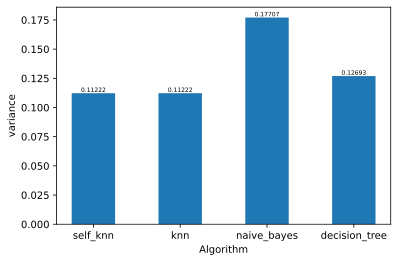

In [80]:
var_lsit = [round(np.var(acc_self_knn_list)*100,5),round(np.var(acc_std_knn_list)*100,5),\
           round(np.var(acc_std_cnb_list)*100,5),round(np.var(acc_std_dtc_list)*100,5)]
labels = ['self_knn', 'knn', 'naive_bayes', 'decision_tree']
plt.bar(range(len(var_lsit)), var_lsit, tick_label=labels,width=0.5)
plt.xlabel('Algorithm')
plt.ylabel('variance')
for a, b in zip(range(len(var_lsit)), var_lsit):
    plt.text(a, b, b, ha='center', va='bottom', fontsize=6)
plt.savefig("algorith_variance.svg", dpi=300,format="svg")